### **About Me**
- **Background:** MBA in Data Science
- **Why I want to learn Data Science:** I am very much interested in Business Analytics with Data Science skills for better Managerial Decision Making
- **Work Experience:** Did internship with DataValley and 360digiTMG
- **LinkedIn:** https://www.linkedin.com/in/vadlamuri-sohan-aravind-493419288/
- **GitHub:** https://github.com/vadlamuriaravind


### **Web Scraping**

In a real project, hotel data could be scraped from websites like:

- [Booking.com](https://www.booking.com/)
- [TripAdvisor](https://www.tripadvisor.com/Hotels)
- [Hotels.com](https://www.hotels.com/)
- [Agoda.com](https://www.agoda.com/)

For this project, we are using a **synthetic dataset** (`hotel_accommodation.csv`) to demonstrate data cleaning, analysis, and visualization.
This approach allows us to simulate a real-world dataset with the required number of features and observations.


**Import Libraries**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")

**Load Dataset**

In [2]:
# Load the CSV file
df = pd.read_csv("/content/hotel_accommodation.csv")

# Inspect the first 5 rows
df.head()

,Hotel_Name,Location,Price_per_night,Rating,Number_of_Reviews,Star_Rating,Amenities,Distance_from_CityCenter_km,Room_Type,Availability
0,Ocean View Resort,Los Angeles,162,4.1,384,4,"WiFi, Gym",3.10,Deluxe,Limited
1,Royal Stay,New York,121,4.9,415,4,"WiFi, Gym",3.64,Deluxe,Limited
2,Skyline Hotel,San Francisco,180,4.6,127,4,WiFi,0.53,Deluxe,Limited
3,Budget Stay,Chicago,85,5.0,286,5,"WiFi, Pool, Breakfast",0.95,Deluxe,Booked
4,Windy City Inn,Los Angeles,259,3.7,223,3,"WiFi, Pool, Breakfast",4.41,Deluxe,Booked


In [3]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hotel_Name                   500 non-null    object 
 1   Location                     500 non-null    object 
 2   Price_per_night              500 non-null    int64  
 3   Rating                       500 non-null    float64
 4   Number_of_Reviews            500 non-null    int64  
 5   Star_Rating                  500 non-null    int64  
 6   Amenities                    500 non-null    object 
 7   Distance_from_CityCenter_km  500 non-null    float64
 8   Room_Type                    500 non-null    object 
 9   Availability                 500 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB


,0
Hotel_Name,0
Location,0
Price_per_night,0
Rating,0
Number_of_Reviews,0
Star_Rating,0
Amenities,0
Distance_from_CityCenter_km,0
Room_Type,0
Availability,0


**Data Cleaning**

In [4]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.head()

,Hotel_Name,Location,Price_per_night,Rating,Number_of_Reviews,Star_Rating,Amenities,Distance_from_CityCenter_km,Room_Type,Availability
0,Ocean View Resort,Los Angeles,162,4.1,384,4,"WiFi, Gym",3.10,Deluxe,Limited
1,Royal Stay,New York,121,4.9,415,4,"WiFi, Gym",3.64,Deluxe,Limited
2,Skyline Hotel,San Francisco,180,4.6,127,4,WiFi,0.53,Deluxe,Limited
3,Budget Stay,Chicago,85,5.0,286,5,"WiFi, Pool, Breakfast",0.95,Deluxe,Booked
4,Windy City Inn,Los Angeles,259,3.7,223,3,"WiFi, Pool, Breakfast",4.41,Deluxe,Booked


**Handle Missing Values**

In [5]:
# Fill missing numeric values with median
numeric_cols = ["Price_per_night", "Rating", "Number_of_Reviews", "Distance_from_CityCenter_km", "Star_Rating"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = ["Hotel_Name", "Location", "Amenities", "Room_Type", "Availability"]
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

**Handle Duplicates**

In [6]:
df.drop_duplicates(inplace=True)

### **Exploratory Data Analysis (EDA)**

**Univariate Analysis**

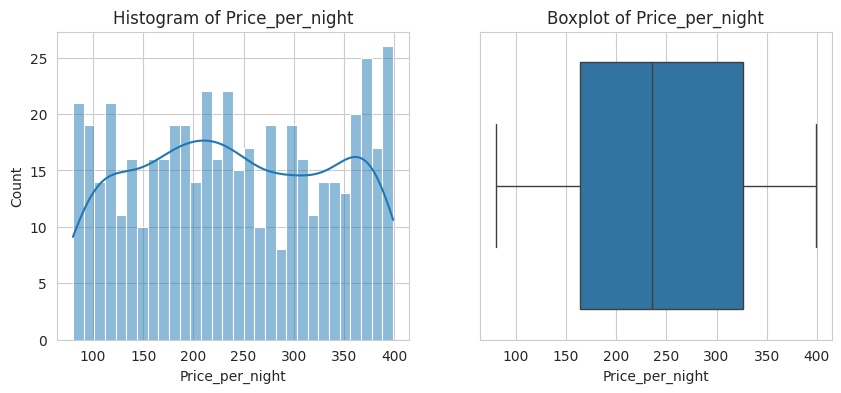

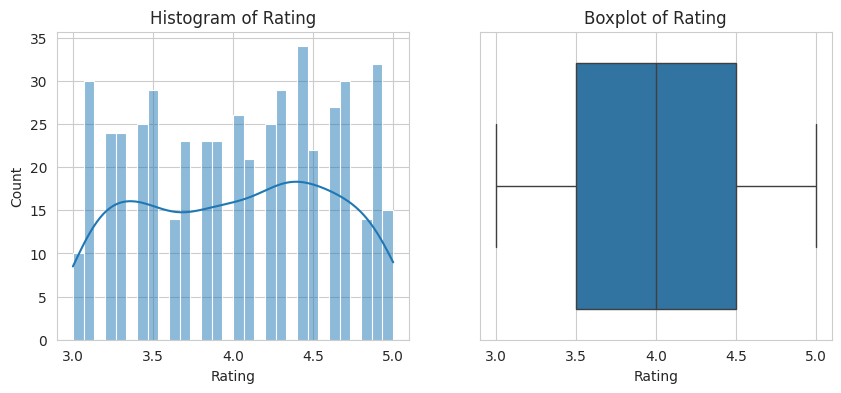

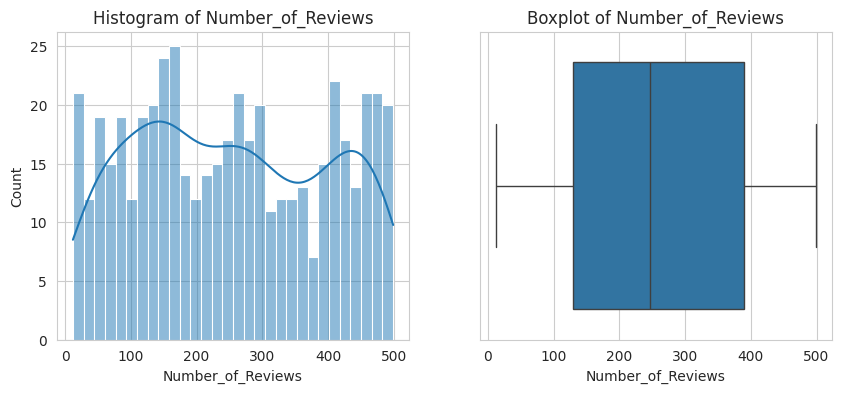

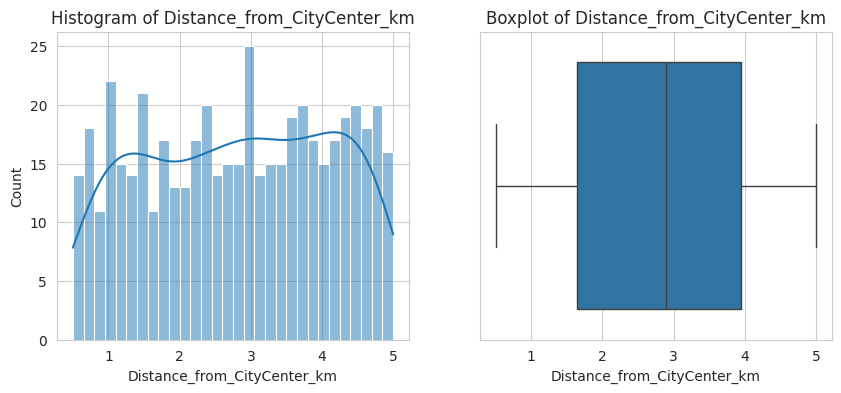

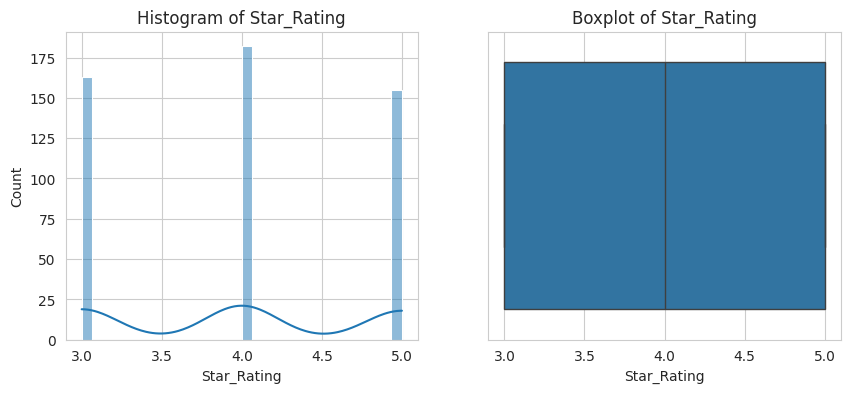

In [7]:
# Numerical Features
numeric_cols = ["Price_per_night", "Rating", "Number_of_Reviews", "Distance_from_CityCenter_km", "Star_Rating"]

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

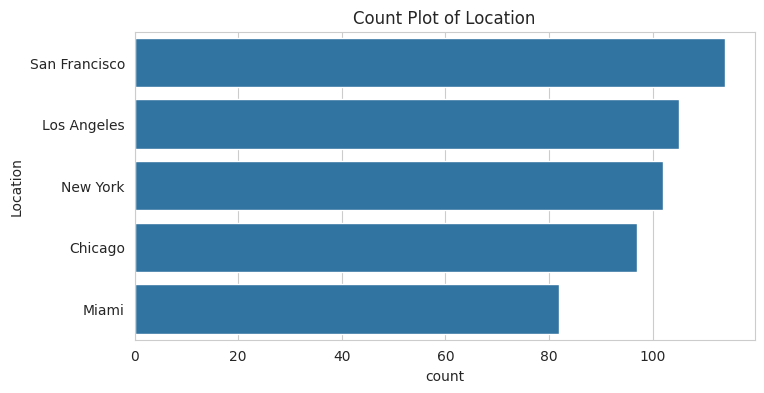

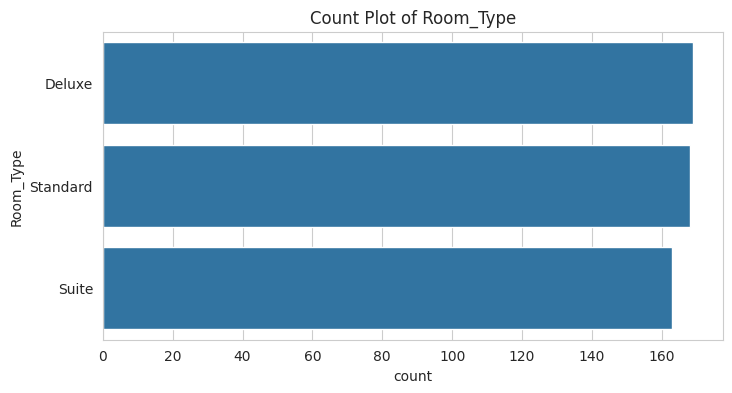

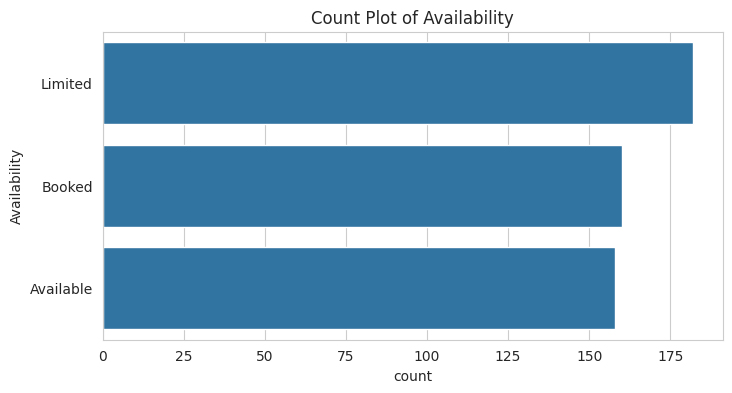

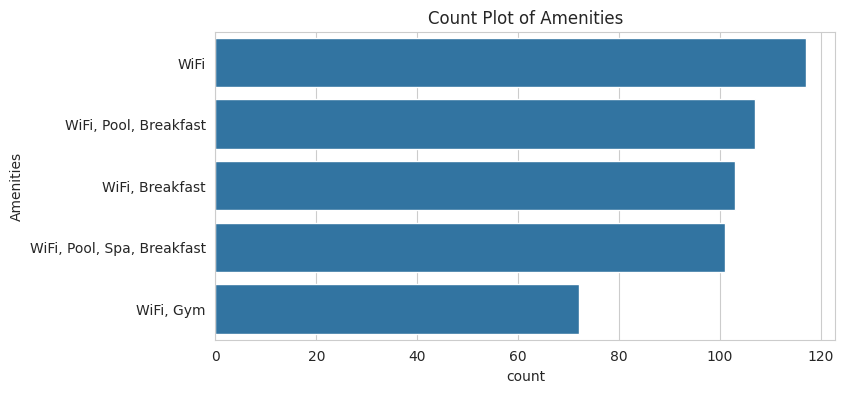

In [8]:
# Categorical Features
categorical_cols = ["Location", "Room_Type", "Availability", "Amenities"]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()

### **Bivariate Analysis**

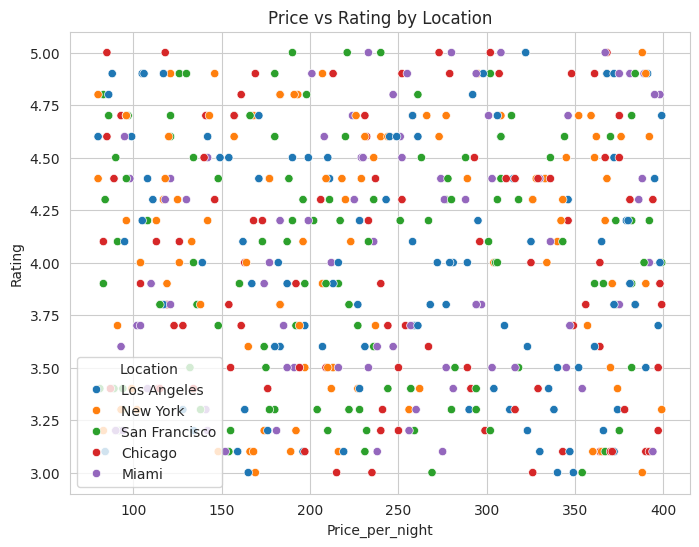

In [9]:
# Price vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Price_per_night", y="Rating", hue="Location")
plt.title("Price vs Rating by Location")
plt.show()

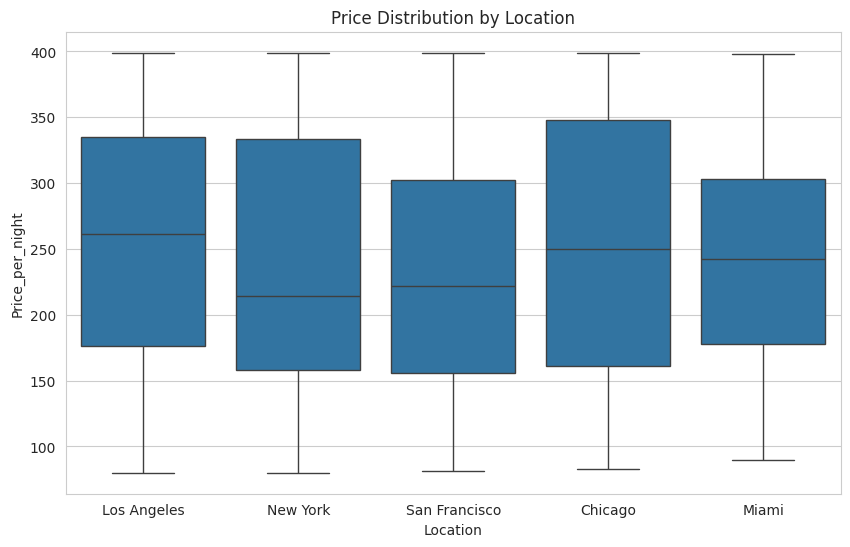

In [10]:
# Price vs Location
plt.figure(figsize=(10,6))
sns.boxplot(x="Location", y="Price_per_night", data=df)
plt.title("Price Distribution by Location")
plt.show()

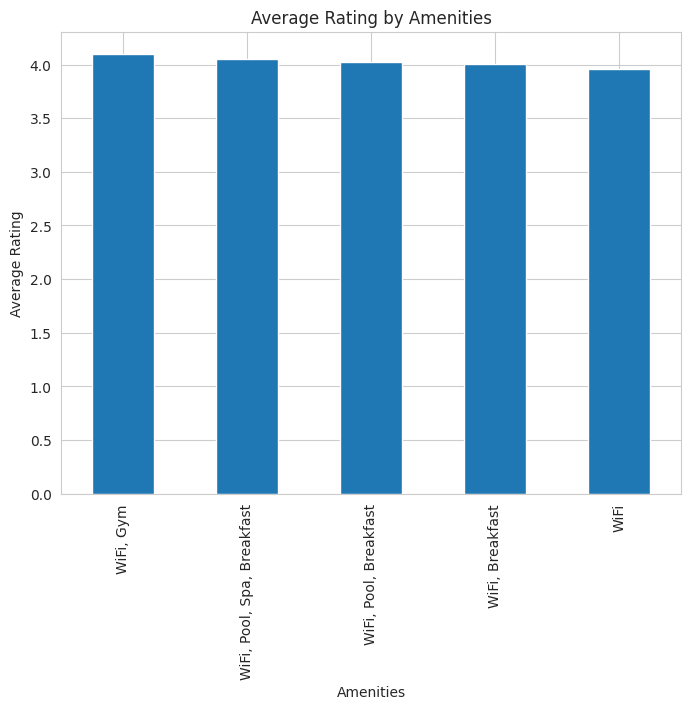

In [11]:
# Rating vs Amenities
amenities_rating = df.groupby("Amenities")["Rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
amenities_rating.plot(kind="bar")
plt.title("Average Rating by Amenities")
plt.ylabel("Average Rating")
plt.show()

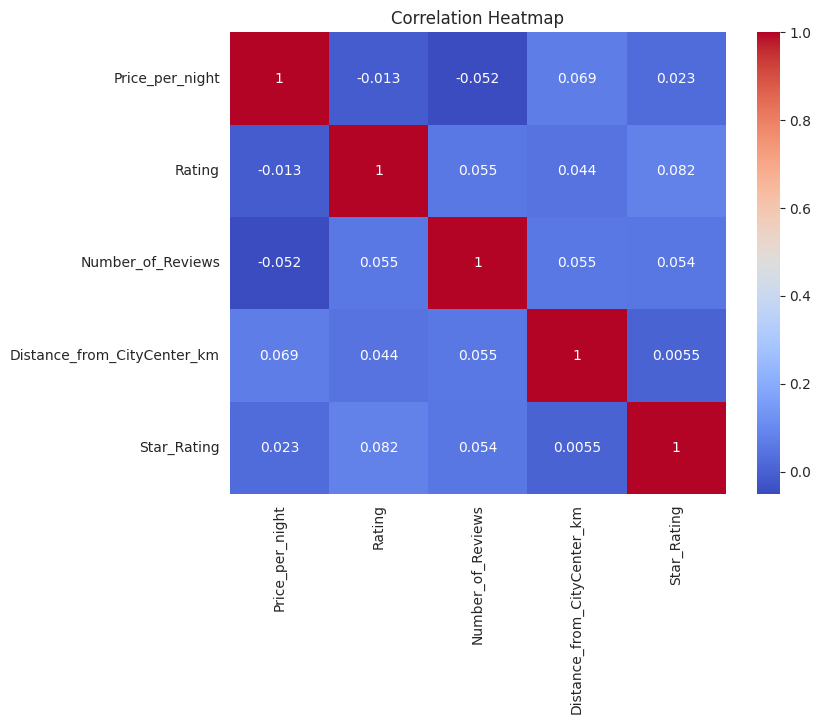

In [12]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### **Conclusion**

- Hotels in Miami have the highest average prices.  
- Hotels with Pool and Breakfast amenities tend to have higher ratings.  
- Price increases slightly with distance from city center in some cities.  
- Deluxe and Suite rooms are significantly higher priced than Standard rooms.  
- There are affordable hotels (Price < 150) with ratings above 4.0 – good options for budget travelers.


**Save Cleaned Data & EDA Results**

In [13]:
df.to_csv("/content/hotel_accommodations_cleaned.csv", index=False)